Problem Statement : Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pyplot import imread
import string 
import spacy
from wordcloud import WordCloud

In [223]:
elon = pd.read_csv("G:/data sceince/Assignments/Text Mining/Elon_musk.csv")

In [224]:
elon.head()

,Unnamed: 0,Text
0,1,@kunalb11 I�m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [227]:
# Removing the unnamed column
elon = elon.loc[:,~elon.columns.str.contains('Unnamed')]

In [228]:
elon

,Text
0,@kunalb11 I�m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


#### Preprocessing the text

In [229]:
elon = [Text.strip() for Text in elon['Text']]      # removing the trailing and leading characters

In [230]:
elon = [Text for Text in elon if Text]           # removing the empty strings from the data
elon[0:15]

['@kunalb11 I�m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It�s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler']

In [231]:
# joining the list of comments into a single text/string

text = ' '.join(elon)

In [131]:
len(text)

158805

There are 158805 words in our data

#### Removing punctuations 

In [132]:
no_punc_text = text.translate(str.maketrans('','',string.punctuation))

In [133]:
no_punc_text

'kunalb11 I�m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It�s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewalletorg

#### Tokenization

In [134]:
import nltk
from nltk.tokenize import word_tokenize

In [135]:
tokens = word_tokenize(no_punc_text)
tokens[0:15]

['kunalb11',
 'I�m',
 'an',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you']

In [136]:
len(tokens)

21122

#### Removing Stopwords

In [77]:
from nltk.corpus import stopwords
nltk.download('punkt')      
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [137]:
text_stopwords = stopwords.words("english")
text_stopwords.append('from')
no_stop_words = [word for word in tokens if not word in text_stopwords]
no_stop_words[:20]

['kunalb11',
 'I�m',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'Cyberpunk',
 'HDR',
 'nextlevel',
 'Have',
 'tried',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'underestimated',
 'teslacn',
 'Congratulations']

#### Normalizing the text(converting all the text to lower case)

In [138]:
lower_words = [text.lower() for text in no_stop_words]
lower_words[5:20]

['tracing',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'tried',
 'joerogan',
 'spotify',
 'great',
 'interview',
 'gtera27',
 'doge',
 'underestimated',
 'teslacn',
 'congratulations']

#### Stemming 

In [139]:
from nltk.stem import PorterStemmer

In [140]:
ps = PorterStemmer()

In [141]:
stem_words = [ps.stem(word) for word in lower_words]
stem_words[5:20]

['trace',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'tri',
 'joerogan',
 'spotifi',
 'great',
 'interview',
 'gtera27',
 'doge',
 'underestim',
 'teslacn',
 'congratul']

#### Lemmatization

In [142]:
nlp = spacy.load("en_core_web_sm")

In [143]:
# joining the stopwords into a paragraph

doc = nlp(' '.join(no_stop_words))
doc[:20]

kunalb11 I�m alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated

In [144]:
lemmas = [token.lemma_ for token in doc]
lemmas[:20]

['kunalb11',
 'I',
 '�',
 'm',
 'alien',
 'IDAACarmack',
 'Ray',
 'trace',
 'Cyberpunk',
 'HDR',
 'nextlevel',
 'have',
 'try',
 'joerogan',
 'Spotify',
 'great',
 'interview',
 'gtera27',
 'Doge',
 'underestimate']

#### POS tagging

In [232]:
one_block = elon[1]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [192]:
# getting the tokens and pos tags for the tokens

for tokens in doc_block[0:20]:
    print(to
          kens,tokens.pos_)

@ID_AA_Carmack DET
Ray PROPN
tracing VERB
on ADP
Cyberpunk PROPN
with ADP
HDR PROPN
is AUX
next ADJ
- PUNCT
level NOUN
. PUNCT
Have AUX
you PRON
tried VERB
it PRON
? PUNCT


In [247]:
# extracting the nouns and verbs
noun_verbs = [token.text for token in doc_block if token.pos_ in ("NOUN","VERB")]
print(noun_verbs[0:15])

['tracing', 'level', 'tried']


In [211]:
from sklearn.feature_extraction.text import CountVectorizer

In [214]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(noun_verbs)
sum_words = X.sum(axis = 0)
word_freq = [(word, sum_words[0,idx]) for word, idx in vectorizer.vocabulary_.items()]
word_freq = sorted(word_freq, key = lambda x: x[1], reverse = True)
wf_df= pd.DataFrame(word_freq)
wf_df.columns = ['words', 'count']
wf_df[0:15]

,words,count
0,tracing,1
1,level,1
2,tried,1


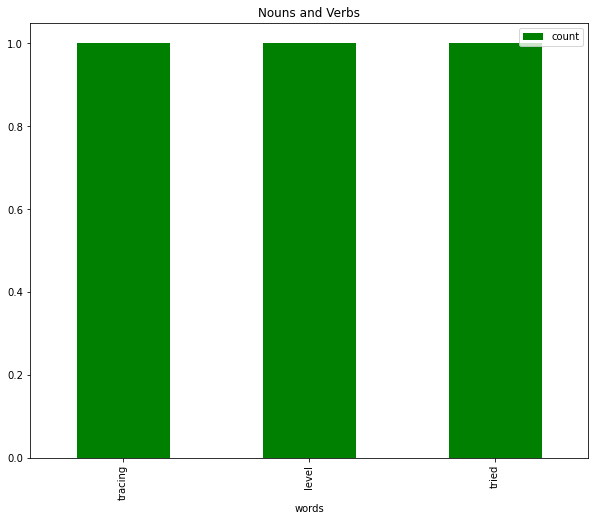

In [220]:
wf_df[0:10].plot.bar(x = 'words', title = 'Nouns and Verbs', figsize = (10,8),color = 'green');

#### Sentiment Analysis

In [145]:
afinn = pd.read_csv("G:/data sceince/Python/Emotion mining/Afinn.csv")

In [146]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [147]:
afinn.shape

(2477, 2)

In [148]:
from itertools import islice

def take(n,iterable):
    return list(islice(iterable, n))

In [149]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [150]:
take(10,affinity_scores)

['abandon',
 'abandoned',
 'abandons',
 'abducted',
 'abduction',
 'abductions',
 'abhor',
 'abhorred',
 'abhorrent',
 'abhors']

In [151]:
from nltk import tokenize

In [233]:
sentence = tokenize.sent_tokenize(' '.join(elon))
sentence[5:15]

['Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It�s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O @freewalletorg Any crypto wallet that won�t give you your private keys should be avoided at all costs @freewalletorg Your app sucks RT @SpaceX: NASA has selected Falcon Heavy to launch the first two elements o

In [234]:
sent_df = pd.DataFrame(sentence, columns = ['sentences'])
sent_df

,sentences
0,@kunalb11 I�m an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
909,"@kenyanwalstreet Not actually a payout, just a..."
910,"It may never pay out, as the stock can�t b� ht..."
911,Details Aug 28.
912,AI symbiosis while u wait @vistacruiser7 @flcn...


In [154]:
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores

In [235]:
def calculate_sentiment(text: str = None)->float:
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [236]:
calculate_sentiment("never pay")

-1

In [237]:
# Getting the word count from sentences

sent_df['word_count'] = sent_df['sentences'].str.split().apply(len)
sent_df['word_count'].head(5)

0    13
1     4
2     4
3    13
4     8
Name: word_count, dtype: int64

In [238]:
sent_df['sentiment_scores'] = sent_df['sentences'].apply(calculate_sentiment)

In [239]:
sent_df

,sentences,word_count,sentiment_scores
0,@kunalb11 I�m an alien @ID_AA_Carmack Ray trac...,13,0
1,Have you tried it?,4,0
2,@joerogan @Spotify Great interview!,4,3
3,@gtera27 Doge is underestimated @teslacn Congr...,13,3
4,Now on to the next for even more!!,8,0
...,...,...,...
909,"@kenyanwalstreet Not actually a payout, just a...",11,0
910,"It may never pay out, as the stock can�t b� ht...",31,-4
911,Details Aug 28.,3,0
912,AI symbiosis while u wait @vistacruiser7 @flcn...,47,-2


In [160]:
sent_df.sort_values(by = 'sentiment_scores').tail(20)

,sentences,word_count,sentiment_scores
835,Giving each person money allows them to decid�...,49,9
644,"It�s not useful for predicting the future, nor...",118,9
101,@BoredElonMusk <U+0001F923><U+0001F923> @erigg...,34,9
76,<U+0001F5A4> RT @SpaceX: Falcon 9 launches Sta...,109,9
588,@ARKInvest @aurmanARK Good analysis @PPathole ...,20,9
157,@harsimranbansal @heydave7 It will most likely...,93,10
149,"@GUNMTLM3 @lexfridman No, but definitely this ...",45,10
181,There�s some great AI out ther� https://t.co/v...,48,10
846,Impressive Tianwen-1 Mars rover mission launch...,103,10
483,Gives a false sense of� https://t.co/aIGaEnC8f...,41,10


In [243]:
sent_df[sent_df['sentiment_scores']>=15]

,sentences,word_count,sentiment_scores
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",231,15
104,@Erdayastronaut @SpaceX Was also thinking that...,94,16


In [245]:
sent_df[sent_df['sentiment_scores']<0]

,sentences,word_count,sentiment_scores
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,14,-2
11,"However, if we don� https://t.co/9Z8Ac6skqx @R...",40,-2
16,That�s what you�re missing.,4,-2
23,https://t.co/UEEocOfcTb The people have spoken...,38,-3
47,Would be better to have small fees than no fee...,48,-2
...,...,...,...
878,Will those who write the algorithms ever reali...,11,-3
885,No expert installer required.� https://t.co/xn...,36,-1
897,"Technically,� https://t.co/TcIVzvc5RA @MightyT...",26,-2
910,"It may never pay out, as the stock can�t b� ht...",31,-4


In [161]:
sent_df['sentiment_scores'].describe()

count    914.000000
mean       1.400438
std        2.697904
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       16.000000
Name: sentiment_scores, dtype: float64

In [115]:
# Visualizing the sentiment scores

In [164]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='sentiment_scores', ylabel='Density'>

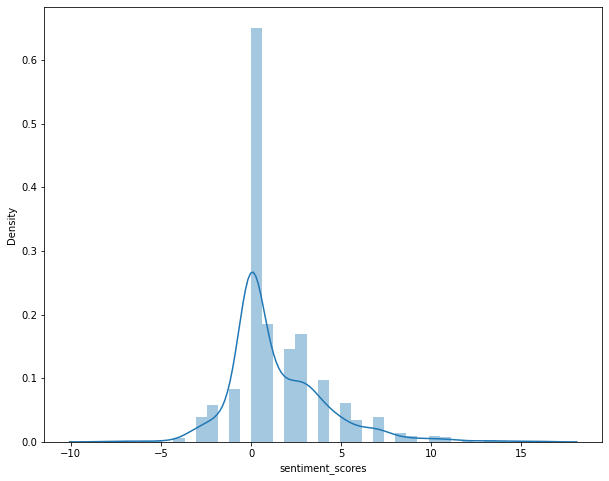

In [246]:
plt.figure(figsize =(10,8))
sns.distplot(sent_df['sentiment_scores'])

<AxesSubplot:ylabel='sentiment_scores'>

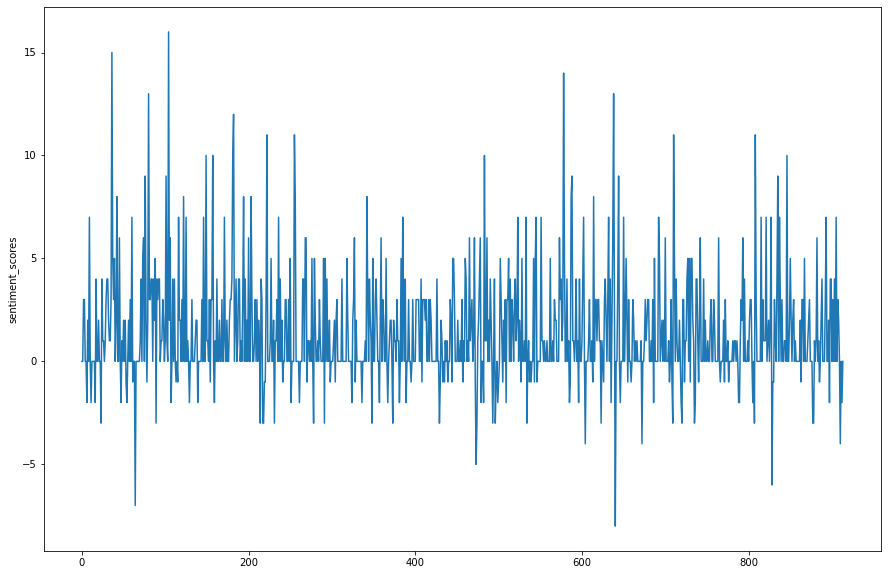

In [242]:
plt.figure(figsize=(15, 10))
sns.lineplot(x = sent_df.index, y = sent_df['sentiment_scores'], data = sent_df)

Inference : Maximun score is 16 and minimum is -8